# Simple Nueral Network

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

In [349]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose','diagnosis_tokenized'])
display(df.head())


,hadm_id,subject_id,expire_flag,diagnosis,admission_type,age,admission_type_encoded,0,1,2,...,c,d,e,f,g,h,i,j,k,l
0,101216,8231,0,PERIPJERAL VASCULAR DISEASE,EMERGENCY,78,1,71.0,247.0,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,123860,188,0,HEPATIC ENCEPHALOPATHY,EMERGENCY,55,1,160.0,115.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,194053,9965,0,ABDOMINAL PAIN,EMERGENCY,307,1,224.0,214.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,106909,286,0,"ASTHMA, COPD EXACERBATION",EMERGENCY,85,1,200.0,154.0,154.0,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173194,18902,0,"CAD, RENAL FAILURE",EMERGENCY,78,1,114.0,99.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
overfitting = df.loc[df['expire_flag'] == 1]

df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)

In [315]:
features = df.drop(columns=['hadm_id','subject_id','expire_flag',
                            'diagnosis','admission_type'])
pydf = df.values
print(pydf.shape)
X = pydf[:,5:470]
y = pydf[:,2]
print(X)
print(y)

(1042, 469)
[[78 1 71.0 ... 0.0 0.0 0.0]
 [55 1 160.0 ... 0.0 0.0 0.0]
 [307 1 224.0 ... 0.0 0.0 0.0]
 ...
 [76 1 272.0 ... 0.0 0.0 0.0]
 [77 1 224.0 ... 0.0 0.0 0.0]
 [79 1 343.0 ... 0.0 0.0 0.0]]
[0 0 0 ... 1 1 1]


In [316]:
print(X.shape)

(1042, 464)


In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modeling with a Simple Neural Network

In [318]:
model = Sequential()
model.add(Dense(12, input_dim=464, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
781/781 [==============================] - 1s 1ms/step - loss: 3.7167 - acc: 0.5467
Epoch 2/150
781/781 [==============================] - 0s 162us/step - loss: 1.6699 - acc: 0.5915
Epoch 3/150
781/781 [==============================] - 0s 153us/step - loss: 1.1876 - acc: 0.6312
Epoch 4/150
781/781 [==============================] - 0s 146us/step - loss: 0.9592 - acc: 0.6684
Epoch 5/150
781/781 [==============================] - 0s 143us/step - loss: 0.8640 - acc: 0.6748
Epoch 6/150
781/781 [==============================] - 0s 147us/step - loss: 0.7727 - acc: 0.6825
Epoch 7/150
781/781 [==============================] - 0s 154us/step - loss: 0.7519 - acc: 0.6927
Epoch 8/150
781/781 [==============================] - 0s 154us/step - loss: 0.6989 - acc: 0.7055
Epoch 9/150
781/781 [==============================] - 0s 139us/step - loss: 0.6656 - acc: 0.7055
Epoch 10/150
781/781 [==============================] - 0s 141us/step - loss: 0.6347 - acc: 0.7132
Epoch 11/150
781/781 

### Confusion Matrix

Confusion matrix, without normalization
[[116  30]
 [  3 112]]


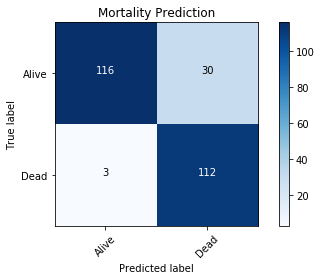

In [319]:
from sklearn.metrics import confusion_matrix 
labels = ['Alive','Dead']
y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.
y_pred = y_pred.reshape(-1)
y_pred = y_pred.astype(np.int64)
y_test = y_test.astype(np.int64)
#print(type(y_pred[1]))
#print(type(y_test[1]))
#print(y_test)
#print(y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,labels,title='Mortality Prediction')

In [280]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()